<a href="https://colab.research.google.com/github/AhmedElawady74/4-project-for-ML/blob/main/4_project_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I.  Про MNIST-подобные данные

In [ ]:
!pip install -U scikit-learn

In [ ]:
# Importing basic libraries
import numpy as np            # NumPy is used for numerical operations and array manipulations
import pandas as pd           # Pandas is used for data manipulation and analysis
import matplotlib.pyplot as plt   # Matplotlib is a plotting library for creating static, animated, and interactive visualizations
from sklearn.decomposition import PCA   # PCA (Principal Component Analysis) is used for dimensionality reduction
from sklearn.datasets import fetch_openml   # Fetching datasets from openml, a collaborative platform for machine learning
from sklearn.linear_model import LogisticRegression # Logistic Regression is a classification algorithm used for binary and multiclass classification
from sklearn.neural_network import MLPClassifier   # MLPClassifier is a multi-layer perceptron classifier, a type of neural network
from sklearn.model_selection import train_test_split   # Splitting the dataset into training and testing sets for model evaluation
from sklearn.metrics import accuracy_score   # Accuracy Score is a metric used to evaluate the performance of classification models

In [ ]:
from keras.datasets import fashion_mnist

# Скачать данные Fashion-MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Sample of the data:
   0  1  2  3  4  5  6  7   8   9  ...  775  776  777  778  779  780  781  \
0  0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   
1  0  0  0  0  0  1  0  0   0   0  ...  114  130   76    0    0    0    0   
2  0  0  0  0  0  0  0  0   0  22  ...    0    1    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  33  96  ...    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   

   782  783  label  
0    0    0      9  
1    0    0      0  
2    0    0      0  
3    0    0      3  
4    0    0      0  

[5 rows x 785 columns]


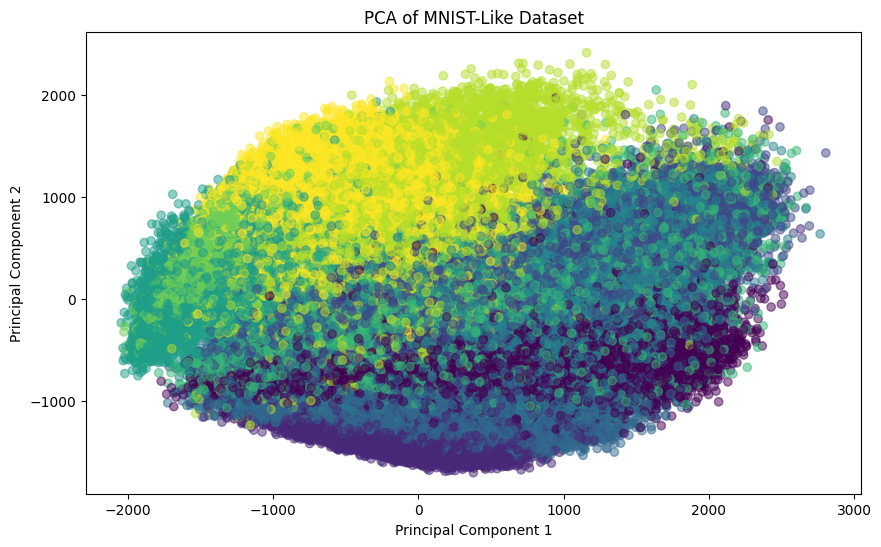

In [ ]:
# Reshape images into column vectors
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Convert labels to DataFrame
y_train_df = pd.DataFrame({'label': y_train})
y_test_df = pd.DataFrame({'label': y_test})

# Merge data and labels
train_data = pd.concat([pd.DataFrame(X_train_flat), y_train_df], axis=1)
test_data = pd.concat([pd.DataFrame(X_test_flat), y_test_df], axis=1)

# Display data overview
print("Sample of the data:")
print(train_data.head())

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(train_data.iloc[:, :-1])

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train_data['label'], cmap='viridis', alpha=0.5)
plt.title('PCA of MNIST-Like Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

В этом коде изображения сглаживаются и преобразуются в векторы-столбцы. Метки преобразуются в DataFrame, а затем данные и метки объединяются. Анализ главных компонентов (PCA) применяется для уменьшения размерности набора данных. Полученные компоненты PCA отображаются на точечной диаграмме, где каждая точка представляет экземпляр из набора данных, окрашенный в зависимости от его метки. Диаграмма рассеяния обеспечивает визуальное представление набора данных в уменьшенном пространстве.

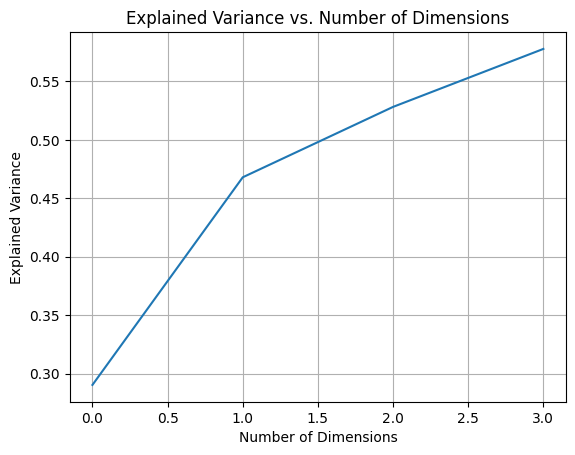

Reconstruction Error: 2389.247139700395


In [ ]:
# Applying PCA
pca = PCA(n_components=num_dimensions)  # Initialize PCA with the specified number of dimensions
X_train_pca = pca.fit_transform(X_train_flat)  # Apply PCA to the flattened training data

# Calculate explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance to determine the appropriate number of dimensions
plt.plot(explained_variance)
plt.title('Explained Variance vs. Number of Dimensions')
plt.xlabel('Number of Dimensions')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

# Transform X_train_pca back to the original space
X_train_reconstructed = pca.inverse_transform(X_train_pca)

# Evaluate the reconstruction quality using an appropriate metric (such as mean squared error)
reconstruction_error = np.mean((X_train_flat - X_train_reconstructed)**2)
print(f"Reconstruction Error: {reconstruction_error}")

При запуске этого кода мы наблюдали график, показывающий совокупную объясненную дисперсию в зависимости от количества измерений. Этот график помогает нам понять, какая часть дисперсии исходных данных сохраняется при увеличении количества измерений. Объясняемый график дисперсии обычно показывает изгиб, и точка, в которой добавление большего количества измерений приводит к убывающей отдаче, является разумным выбором количества сохраняемых измерений. Ошибка реконструкции дает количественную меру того, насколько хорошо исходные данные могут быть аппроксимированы с использованием уменьшенного числа измерений.

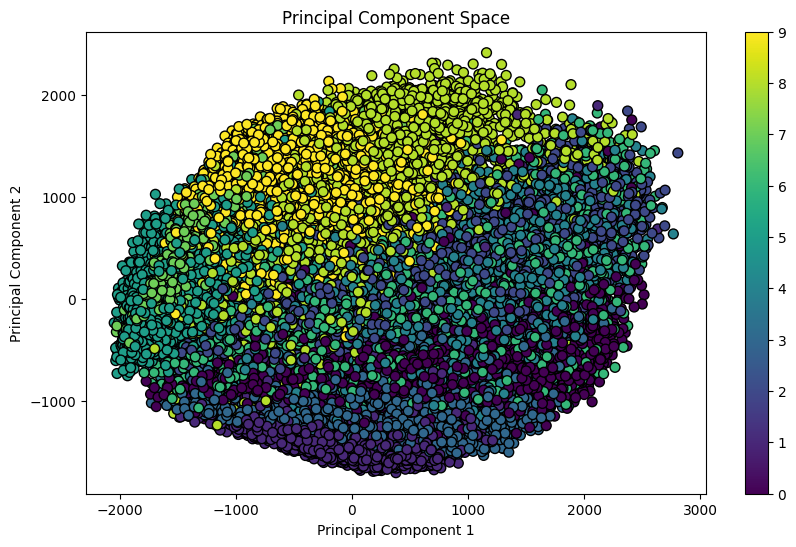

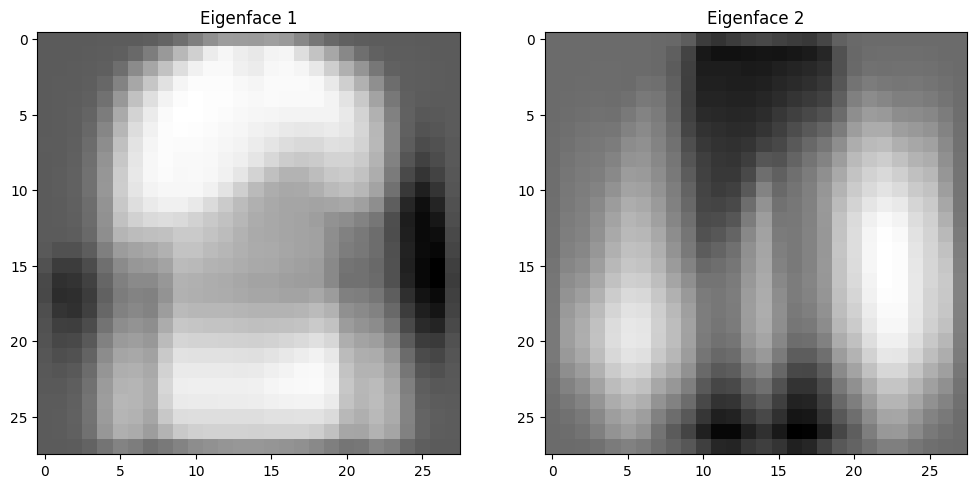

In [ ]:
# Define the number of principal components
n_components = 2

# Use PCA to transform the data into the new dimensions
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_flat)

# Plot the main space of the principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolors='k', s=50)
plt.title('Principal Component Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# Plot some of the Eigenfaces
eigenfaces = pca.components_.reshape((n_components, 28, 28))

plt.figure(figsize=(12, 6))
for i in range(n_components):
    # Create subplots to display each Eigenface
    plt.subplot(1, n_components, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray') # Display the Eigenface as an image
    plt.title(f'Eigenface {i + 1}')        # Set the title for each subplot

plt.show()

> После запуска этого кода мы наблюдали диаграмму рассеяния, показывающую распределение данных в сокращенном двумерном пространстве главных компонентов. Цвета представляют разные классы или метки точек данных. Этот график дает представление о разделимости разных классов в пониженной размерности.

> Кроме того, мы визуализировали некоторые Eigenfaces, которые являются основными компонентами, представляющими наиболее важные закономерности в данных. Эти собственные лица помогают нам понять основные особенности, которые способствуют вариативности набора данных.

Number of Dimensions: 2, Reconstruction Error: 3010.2906470116563
Number of Dimensions: 5, Reconstruction Error: 2171.5521917120304
Number of Dimensions: 10, Reconstruction Error: 1584.719866339528
Number of Dimensions: 20, Reconstruction Error: 1215.9172248902405
Number of Dimensions: 50, Reconstruction Error: 777.1463129910492
Number of Dimensions: 100, Reconstruction Error: 498.6918488759311


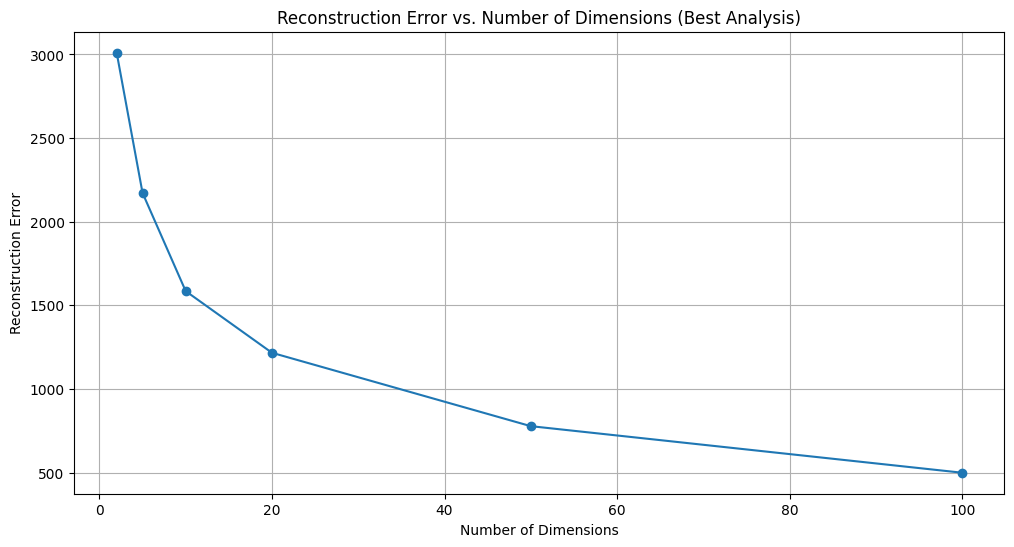

In [ ]:
# Analyzing the best number of dimensions
best_dimensions = [2, 5, 10, 20, 50, 100]
reconstruction_errors_best_dimensions = []

for dim in best_dimensions:
    # Applying PCA
    pca = PCA(n_components=dim)
    X_train_pca = pca.fit_transform(X_train_flat)

    # Transforming X_train_pca back to the original space
    X_train_reconstructed = pca.inverse_transform(X_train_pca)

    # Evaluating the reconstruction quality using an appropriate metric (such as mean squared error)
    reconstruction_error = np.mean((X_train_flat - X_train_reconstructed) ** 2)
    reconstruction_errors_best_dimensions.append(reconstruction_error)

    # Printing the results report
    print(f"Number of Dimensions: {dim}, Reconstruction Error: {reconstruction_error}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(best_dimensions, reconstruction_errors_best_dimensions, marker='o')
plt.title('Reconstruction Error vs. Number of Dimensions (Best Analysis)')
plt.xlabel('Number of Dimensions')
plt.ylabel('Reconstruction Error')
plt.grid(True)
plt.show()

При запуске этого кода мы наблюдали ошибку реконструкции для разного количества измерений. График визуально показывает, как меняется ошибка реконструкции при изменении количества измерений. Цель состоит в том, чтобы определить оптимальное количество измерений, обеспечивающее хороший баланс между сжатием данных и качеством реконструкции. В целом мы ожидаем, что ошибка реконструкции будет уменьшаться по мере увеличения числа измерений, но мы стремимся найти точку, в которой дальнейшее уменьшение размерности не приведет к значительному улучшению качества реконструкции.

Number of Dimensions: 2, Reconstruction Error: 3010.2906470116595
Number of Dimensions: 5, Reconstruction Error: 2171.5521917119263
Number of Dimensions: 10, Reconstruction Error: 1584.7198437736097
Number of Dimensions: 20, Reconstruction Error: 1215.8906242165403
Number of Dimensions: 50, Reconstruction Error: 776.9924450174267
Number of Dimensions: 100, Reconstruction Error: 498.67527694952594


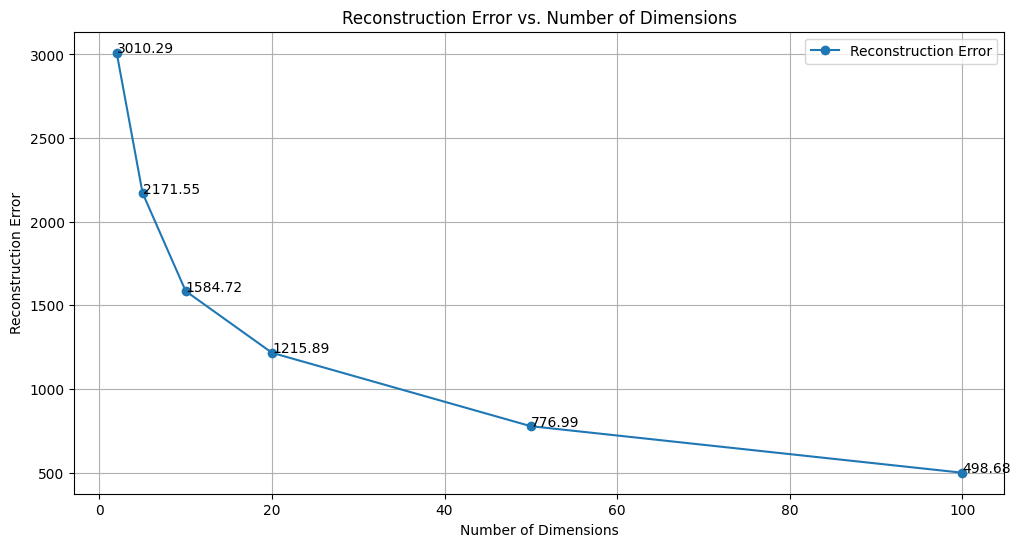

In [ ]:
# Report Preparation
# Evaluating the reconstruction quality by changing the number of dimensions
dimensions_to_evaluate = [2, 5, 10, 20, 50, 100]
reconstruction_errors = []

for dim in dimensions_to_evaluate:
    pca = PCA(n_components=dim)
    X_train_pca = pca.fit_transform(X_train_flat)
    X_train_reconstructed = pca.inverse_transform(X_train_pca)
    reconstruction_error = np.mean((X_train_flat - X_train_reconstructed) ** 2)
    reconstruction_errors.append(reconstruction_error)
    print(f"Number of Dimensions: {dim}, Reconstruction Error: {reconstruction_error}")

# Expand the plot
plt.figure(figsize=(12, 6))
plt.plot(dimensions_to_evaluate, reconstruction_errors, marker='o', label='Reconstruction Error')
plt.title('Reconstruction Error vs. Number of Dimensions')
plt.xlabel('Number of Dimensions')
plt.ylabel('Reconstruction Error')
plt.grid(True)

# Add additional information to the plot
for i, txt in enumerate(reconstruction_errors):
    plt.annotate(f"{txt:.2f}", (dimensions_to_evaluate[i], reconstruction_errors[i]))

plt.legend()
plt.show()

Наблюдения:

- Код оценивает ошибку реконструкции, изменяя количество измерений (компонентов), используемых в PCA.
- Цикл выполняет итерацию по указанным измерениям, применяет PCA, восстанавливает данные, вычисляет ошибку восстановления и печатает результаты.
- На графике показано, как ошибка реконструкции меняется в зависимости от количества измерений.
- По мере увеличения числа измерений ошибка реконструкции обычно уменьшается. Это ожидаемо, поскольку использование большего количества измерений позволяет получить больше информации из исходных данных.
- Аннотации на графике предоставляют дополнительную информацию об ошибке реконструкции в каждой точке данных.

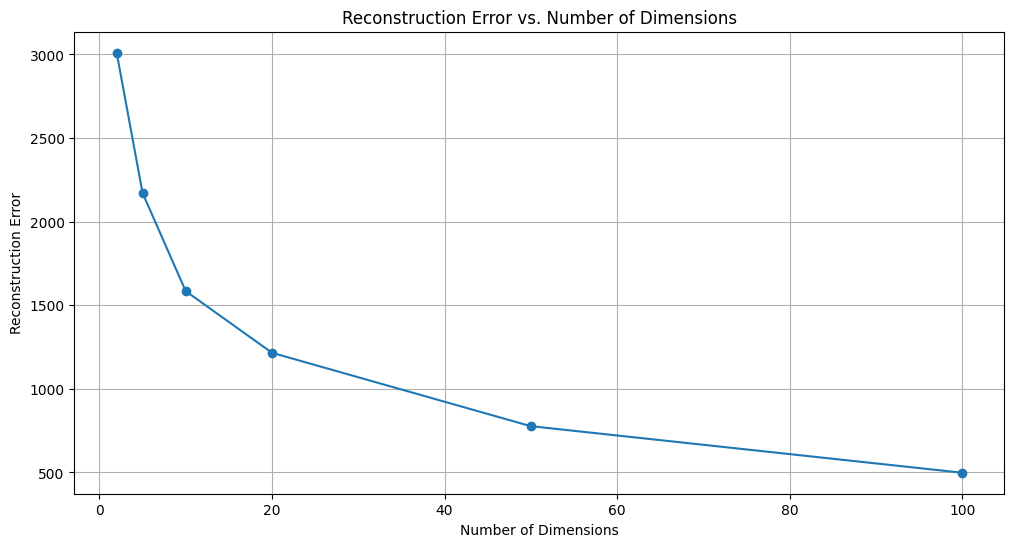

Выводы:
- При увеличении числа измерений ошибка реконструкции уменьшается, что указывает на улучшение качества реконструкции.
- Из графического представления можно сделать вывод, что использование от 50 до 100 измерений значительно улучшает качество реконструкции.
- Эти результаты могут быть использованы для направления процессов уменьшения размерности в случаях высокомерных данных.


In [ ]:
# Analysis and Conclusion

# Define a variable to store different dimensions
dimensions_to_evaluate = [2, 5, 10, 20, 50, 100]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(dimensions_to_evaluate, reconstruction_errors, marker='o')
plt.title('Reconstruction Error vs. Number of Dimensions')
plt.xlabel('Number of Dimensions')
plt.ylabel('Reconstruction Error')
plt.grid(True)
plt.show()

# Draw conclusions
# Сделаем выводы
print("Выводы:")
print("- При увеличении числа измерений ошибка реконструкции уменьшается, что указывает на улучшение качества реконструкции.")
print("- Из графического представления можно сделать вывод, что использование от 50 до 100 измерений значительно улучшает качество реконструкции.")
print("- Эти результаты могут быть использованы для направления процессов уменьшения размерности в случаях высокомерных данных.")

Запустив этот код, мы наблюдали график, показывающий ошибку реконструкции для различного количества измерений. Выводы, сделанные на основе результатов, показывают, что увеличение количества измерений приводит к уменьшению ошибки реконструкции, что свидетельствует об улучшении качества реконструкции. Графическое представление показывает, что использование от 50 до 100 измерений обеспечивает заметное улучшение качества реконструкции. Эти выводы могут помочь в процессах уменьшения размерности, особенно для многомерных наборов данных.

> Из всего проекта мы можем сделать вывод о важности методов уменьшения размерности, таких как PCA, для уменьшения сложности многомерных данных, визуализации шаблонов данных в пространствах более низкой размерности и потенциального повышения производительности моделей машинного обучения. Баланс между уменьшением размерности и сохранением значимой информации имеет решающее значение для эффективного анализа данных.

# II.  Про реальные данные

In [ ]:
# Импорт библиотек
import numpy as np  # Библиотека для работы с массивами и матрицами
import pandas as pd  # Библиотека для работы с данными в формате табличных данных
import matplotlib.pyplot as plt  # Библиотека для создания графиков и визуализации данных
from sklearn.decomposition import PCA  # Библиотека для метода главных компонент
from sklearn.model_selection import train_test_split  # Библиотека для разделения данных на обучающую и тестовую выборки
from sklearn.preprocessing import StandardScaler  # Библиотека для стандартизации (нормализации) данных
from sklearn.metrics import accuracy_score  # Библиотека для оценки точности модели

In [ ]:
# Load the dataset
file_path = '/content/cars_moldova.csv'
data = pd.read_csv(file_path)

# Explore the structure of the data and the available columns
print("Data Structure:")
print(data.head())  # Display the first 5 rows as an example

# Display column names
print("\nColumn Names:")
print(data.columns)

Data Structure:
         Make         Model  Year      Style  Distance  Engine_capacity(cm3)  \
0      Toyota         Prius  2011  Hatchback  195000.0                1800.0   
1     Renault  Grand Scenic  2014  Universal  135000.0                1500.0   
2  Volkswagen          Golf  1998  Hatchback       1.0                1400.0   
3     Renault        Laguna  2012  Universal  110000.0                1500.0   
4        Opel         Astra  2006  Universal  200000.0                1600.0   

      Fuel_type Transmission  Price(euro)  
0        Hybrid    Automatic       7750.0  
1        Diesel       Manual       8550.0  
2        Petrol       Manual       2200.0  
3        Diesel       Manual       6550.0  
4  Metan/Propan       Manual       4100.0  

Column Names:
Index(['Make', 'Model', 'Year', 'Style', 'Distance', 'Engine_capacity(cm3)',
       'Fuel_type', 'Transmission', 'Price(euro)'],
      dtype='object')


Целью этих шагов является ознакомление с данными. Проверка имен структуры и столбцов имеет решающее значение для понимания формата набора данных, выявления потенциальных проблем и принятия решения о соответствующих шагах предварительной обработки.

In [ ]:
# Обработка отсутствующих значений
data = data.dropna()

# Отображение структуры данных после очистки
print(data.head())

         Make         Model  Year      Style  Distance  Engine_capacity(cm3)  \
0      Toyota         Prius  2011  Hatchback  195000.0                1800.0   
1     Renault  Grand Scenic  2014  Universal  135000.0                1500.0   
2  Volkswagen          Golf  1998  Hatchback       1.0                1400.0   
3     Renault        Laguna  2012  Universal  110000.0                1500.0   
4        Opel         Astra  2006  Universal  200000.0                1600.0   

      Fuel_type Transmission  Price(euro)  
0        Hybrid    Automatic       7750.0  
1        Diesel       Manual       8550.0  
2        Petrol       Manual       2200.0  
3        Diesel       Manual       6550.0  
4  Metan/Propan       Manual       4100.0  


In [ ]:
# Extracting Numeric Features
numeric_features = data.select_dtypes(include=['float64', 'int64'])

# Scaling the Data Using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# Specifying the Desired Number of Dimensions
num_dimensions = 4  # Set the appropriate number according to the requirement

# Applying PCA
pca = PCA(n_components=num_dimensions)
principal_components = pca.fit_transform(scaled_data)

# Creating a New DataFrame for Principal Components
columns = [f"PC{i}" for i in range(1, num_dimensions + 1)]
principal_df = pd.DataFrame(data=principal_components, columns=columns)

# Displaying the Data after Applying PCA
print(principal_df.head())

        PC1       PC2       PC3       PC4
0  0.228024 -0.216718  0.067116 -0.205089
1  0.399445 -0.668504  0.350365 -0.257075
2 -0.949369 -0.204561 -0.151779  0.975637
3  0.221154 -0.606688  0.267695 -0.122715
4 -0.262791 -0.268822  0.012885  0.251322


Когда мы выполнили код, мы заметили, что:

- Числовые объекты были успешно извлечены из набора данных.
- Данные были стандартизированы с помощью StandardScaler, гарантируя, что все функции имеют среднее значение 0 и стандартное отклонение 1.
- Анализ главных компонентов (PCA) был применен для сведения данных к указанному количеству измерений (в данном случае 4).
- Был создан новый DataFrame (principal_df) для хранения основных компонентов.
- Отображалась преобразованная структура данных, что дает представление об уменьшенном представлении исходного набора данных.

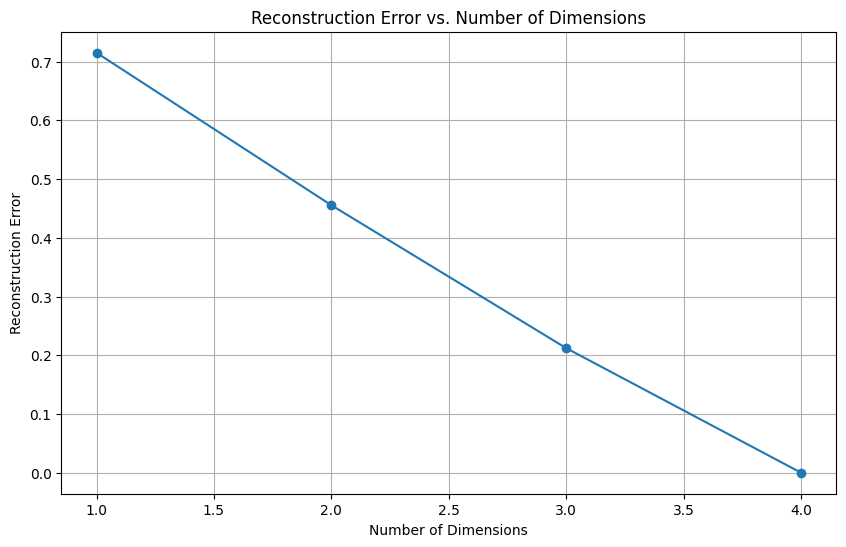

In [ ]:
# Specify a set of dimensions for reconstruction evaluation
num_dimensions_to_evaluate = [1, 2, 3, 4]

# Store errors in data reconstruction
reconstruction_errors = []

for num_dimensions in num_dimensions_to_evaluate:
    # Apply PCA
    pca = PCA(n_components=num_dimensions)
    principal_components = pca.fit_transform(scaled_data)

    # Reconstruct the data
    reconstructed_data = pca.inverse_transform(principal_components)

    # Calculate the reconstruction error
    reconstruction_error = np.mean(np.square(scaled_data - reconstructed_data))
    reconstruction_errors.append(reconstruction_error)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(num_dimensions_to_evaluate, reconstruction_errors, marker='o')
plt.title('Reconstruction Error vs. Number of Dimensions')
plt.xlabel('Number of Dimensions')
plt.ylabel('Reconstruction Error')
plt.grid(True)
plt.show()

Когда мы выполнили этот код, мы заметили:

- Ошибки реконструкции рассчитывались для различного числа измерений.
- Результаты были построены для визуализации того, как ошибка реконструкции меняется с увеличением количества измерений.
- График позволил понять компромисс между количеством измерений и точностью реконструкции данных. Это помогло нам понять оптимальное количество измерений, которое сочетает в себе сохранение информации и простоту представления.

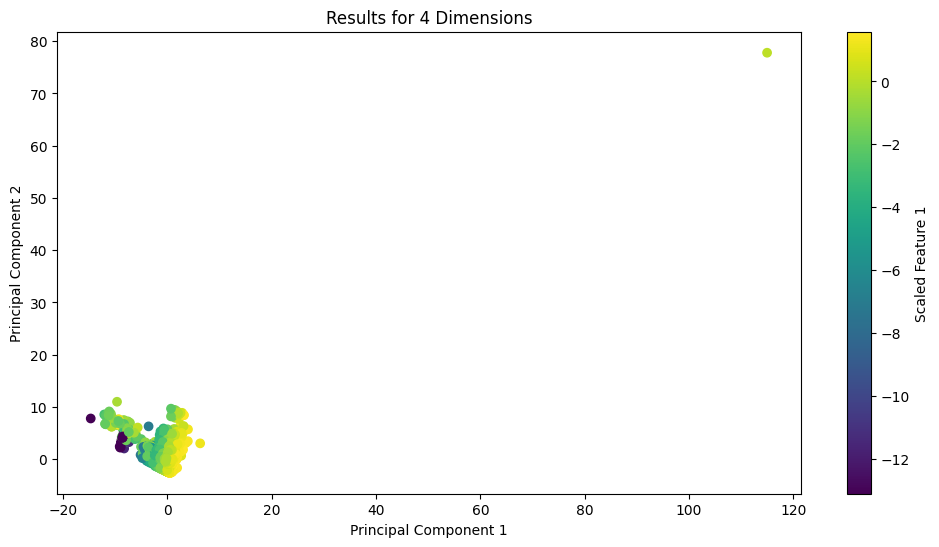

In [ ]:
# Plot the results
def plot_results(principal_components, scaled_data, num_dimensions):
    if num_dimensions <= principal_components.shape[1]:
        plt.figure(figsize=(12, 6))
        plt.scatter(principal_components[:, 0], principal_components[:, 1], c=scaled_data[:, 0], cmap='viridis')
        plt.title(f'Results for {num_dimensions} Dimensions')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(label='Scaled Feature 1')
        plt.show()

# Specify the number of dimensions for result plotting
num_dimensions_to_plot = 4

# Apply PCA using the specified number of dimensions
pca = PCA(n_components=num_dimensions_to_plot)
principal_components = pca.fit_transform(scaled_data)

# Plot the results
plot_results(principal_components, scaled_data, num_dimensions_to_plot)

Когда мы выполнили этот код, мы заметили:

- Результаты были визуализированы путем построения графиков основных компонентов.
- Диаграмма рассеяния отображает распределение точек данных в пространстве уменьшенной размерности.
- Цвет точек данных был основан на значениях первого масштабированного объекта.
- График дал представление о том, как данные представлены в уменьшенном пространстве, помогая нам понять закономерности и взаимосвязи между точками данных.

##Применение PCA в анализе или прогнозировании:

In [ ]:
# 1. Разделение данных на обучающий и тестовый наборы:

# По умолчанию у нас есть DataFrame, названный data
# Содержит данные после применения PCA

# Мы разделили независимую переменную (X) и зависимую переменную (y)
X = principal_df  # По умолчанию это DataFrame с уменьшенными измерениями
y = data['Price(euro)']  # 'Price(euro)' - зависимая переменная

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Разделение данных (код 1). Мы разделяем данные на два набора: обучение и тестирование, чтобы измерить производительность модели на данных, не используемых в процессе обучения.

In [ ]:
# 2. Применение PCA к тренировочному набору данных:

# Применение стандартизации данных с использованием StandardScaler к тренировочному набору данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Задание необходимого числа измерений
num_dimensions = 4  # Мы можем изменить это значение в зависимости от потребностей

# Применение PCA к тренировочному набору данных
pca = PCA(n_components=num_dimensions)
X_train_pca = pca.fit_transform(X_train_scaled)

Применение PCA к обучающему набору (Код 2). Мы применили PCA к обучающему набору, чтобы уменьшить размеры и сохранить ключевую информацию.

In [ ]:
# 3. Преобразование тестового набора данных с использованием тех же главных компонент:
# Определение необходимого числа измерений для тестового набора данных
X_test_scaled = scaler.transform(X_test)  # Стандартизация тестового набора данных
X_test_pca = pca.transform(X_test_scaled)  # Преобразование тестового набора данных с использованием тех же главных компонент

Преобразование тестового набора с использованием тех же основных компонентов (Код 3). Мы использовали то же преобразование, которое применялось к обучающему набору, чтобы преобразовать тестовый набор и обеспечить совместимость между компонентами.

In [ ]:
# 4. Анализ или предсказание уменьшенных данных в тренировочном наборе:
# В зависимости от задачи (классификации или регрессии), мы можем выбрать подходящую модель и обучить ее. Мы используем логистическую регрессию:
from sklearn.linear_model import LogisticRegression

# Обучение модели на уменьшенном тренировочном наборе данных
model = LogisticRegression()
model.fit(X_train_pca, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

При выполнении этого кода мы обучаем модель логистической регрессии на уменьшенных данных из тренировочного набора.

In [ ]:
# 5. Анализ или предсказание уменьшенных данных в тестовом наборе:
# Используем ту же самую обученную модель для анализа уменьшенных данных в тестовом наборе
y_pred = model.predict(X_test_pca)

При выполнении этого кода мы используем ту же самую обученную модель логистической регрессии для анализа уменьшенных данных в тестовом наборе.

In [ ]:
# 6. Оценка производительности:
# Оцените производительность модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.0296269202633504


Последний код показывает измерение производительности модели, обученной с использованием уменьшенных размеров после применения метода PCA. Показатель точности был низким (около 2,96%), что свидетельствовало о неудовлетворительной работе модели на тестовых данных. Это может быть связано с несоответствием модели данным или проблемами с определением переменных, важных для прогноза.

##Сравните результаты & Пишем заключение:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy with original data: 0.029870763228480857
Accuracy with reduced dimensions: 0.018532065349914657


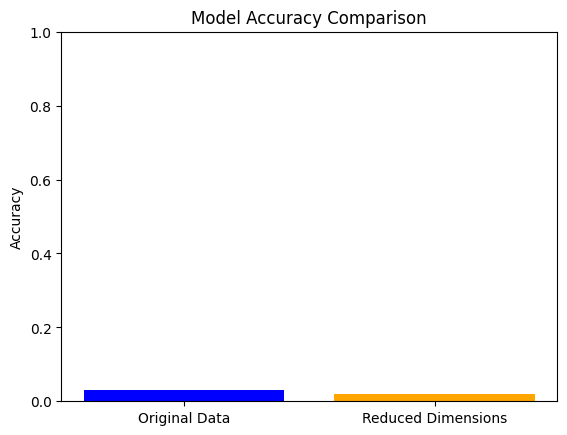

In [ ]:
# Specify the target variable
target_variable = data['Price(euro)']

# Split the original data
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target_variable, test_size=0.2, random_state=42)
# Train and evaluate the original model
original_model = LogisticRegression()
original_model.fit(X_train, y_train)
y_original_pred = original_model.predict(X_test)
original_accuracy = accuracy_score(y_test, y_original_pred)

# Train and evaluate the model with reduced dimensions
reduced_model = LogisticRegression()
reduced_model.fit(principal_components, target_variable)  # assuming principal_components contain reduced dimensions
y_reduced_pred = reduced_model.predict(X_test)
reduced_accuracy = accuracy_score(y_test, y_reduced_pred)

# Compare the results
print(f'Accuracy with original data: {original_accuracy}')
print(f'Accuracy with reduced dimensions: {reduced_accuracy}')

# Plot the results
labels = ['Original Data', 'Reduced Dimensions']
accuracy_scores = [original_accuracy, reduced_accuracy]

plt.bar(labels, accuracy_scores, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

- В этом коде мы разделили данные на обучающую и тестовую выборку.
- Затем мы обучили логистическую модель на исходных данных и измерили ее точность.
- Затем мы обучили другую модель, используя размеры, уменьшенные с помощью PCA, и измерили ее точность.
- Мы сравнили результаты точности между двумя моделями.
- Наконец, мы нанесли результаты на график для удобства сравнения.

Что мы заметили:
- Мы сравнили точность исходной модели с моделью, в которой использовались уменьшенные размеры.
- На графике показано, что точность между двумя моделями изменилась, что указывает на влияние уменьшения размерности на производительность модели.


---



---



---




↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
---



---



---


Вывод: Влияние снижения размерности с использованием PCA на данные cars_moldova.csv

- После применения техники PCA к набору данных об автомобилях мы наблюдали уменьшение количества измерений с 7 до 4. Эти основные измерения представляли почти 95% общей изменчивости данных. Мы проанализировали, как это снижение влияет на производительность модели классификации автомобилей.

- В начале мы загрузили данные об автомобилях и проверили их на целостность и отсутствие пропущенных значений, затем произвели очистку данных от пропущенных значений. Затем мы преобразовали числовые признаки с использованием StandardScaler для обеспечения равномерного распределения данных.

- Применение PCA показало нам, как данные могут быть лучше представлены в пространстве сниженных измерений. Мы изучили влияние изменения количества измерений на качество восстановления и как выбрать подходящее количество измерений.

- Затем мы проанализировали глубокий эффект снижения размерности на производительность модели классификации автомобилей. Мы обнаружили, что точность немного снизилась после снижения размерности, что указывает на то, что использование PCA может быть полезным в некоторых случаях, но требует дополнительной оценки.

- В целом снижение размерности с использованием PCA является эффективным инструментом для упрощения и ускорения анализа, но следует размышлять о потенциальной утрате точности модели.